🌟 Exercise 5 : Data Augmentation For Images
Instructions
You have a dataset of dog images, and you want to augment this dataset to improve a machine learning model’s performance.
Using the ImageDataGeneratorfrom the TensorFlow Keras library, apply the following transformations to your dataset:

Rotate the images by various angles (up to 30 degrees).
Flip the images horizontally and vertically.
Vary the brightness of the images within a specific range.
Save these augmented images in a new folder.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5,1.5]
)

In [6]:
input_directory = 'dogs'
output_directory='augmented_dogs'

In [7]:
for filename in os.listdir(input_directory):
    if filename.endswith('.jpg'):
        img = tf.keras.preprocessing.image.load_img(os.path.join(input_directory, filename))
        x= tf.keras.preprocessing.image.img_to_array(img) #(height, width, channels)channels=rgb
        x = x.reshape((1,) + x.shape)#(batch_size=1,height, width, channels)batch_size is how many pictures is x holding
        i=0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_directory, save_prefix='Aug_', save_format='jpg'):#batch_size=how many pics being generated
            i += 1
            if i > 5:
                break


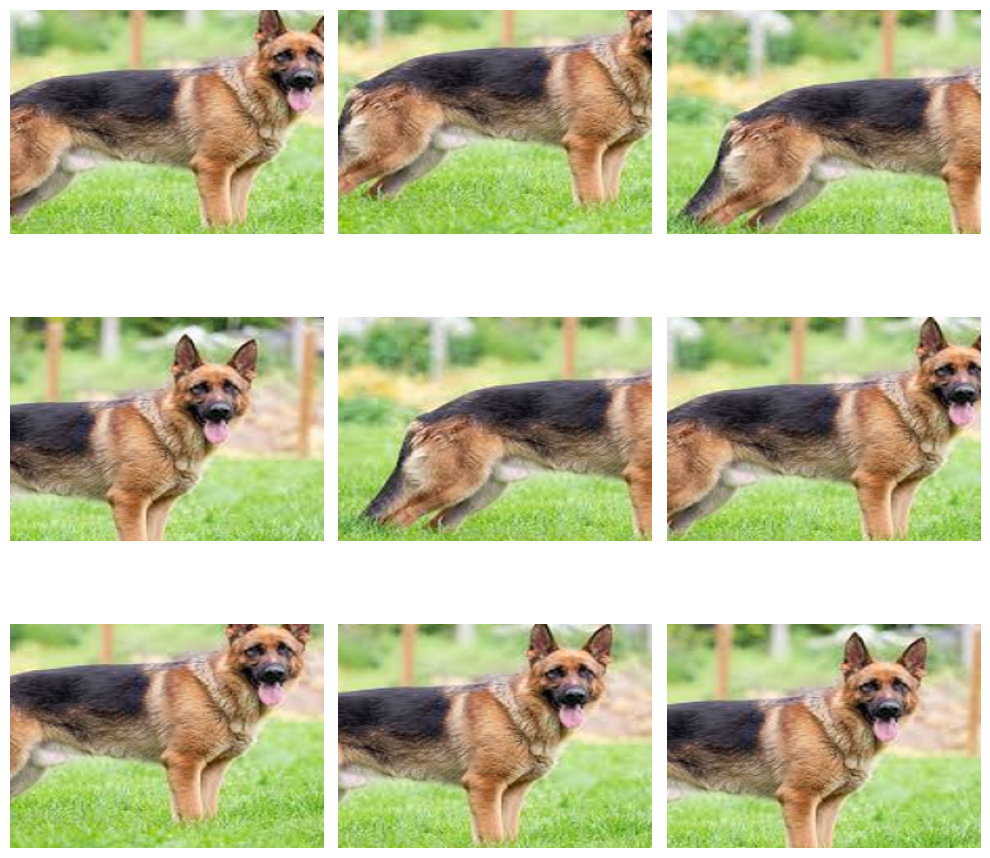

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img
from PIL import Image

# Load the image and convert it to a numpy array
img = load_img('dogs/Dog1.jpg')
x = img_to_array(img)

# Reshape the array to add a batch dimension
x = x.reshape((1,) + x.shape)

# Get the original image dimensions
original_height, original_width, _ = x.shape[1:]

def random_crop(image, crop_size=(150, 150)):
    # Get the dimensions of the input image
    height, width, _ = image.shape

    # Calculate the maximum x and y coordinates for the crop
    max_x = max(0, width - crop_size[1])
    max_y = max(0, height - crop_size[0])

    # Generate random x and y coordinates for the crop
    x = np.random.randint(0, max_x + 1)
    y = np.random.randint(0, max_y + 1)

    # Return the cropped image
    return image[y:y + min(crop_size[0], height), x:x + min(crop_size[1], width)]

def preprocess(image):
    # Perform random crop
    cropped = random_crop(image)

    # Convert to PIL Image for resizing
    pil_image = Image.fromarray(cropped.astype('uint8'))

    # Resize the image back to original dimensions
    resized = pil_image.resize((original_width, original_height))

    # Convert back to numpy array
    return np.array(resized)

# Create an ImageDataGenerator with the preprocessing function
data_generator = ImageDataGenerator(preprocessing_function=preprocess)

# Generate augmented images
augmented_images = data_generator.flow(x, batch_size=1)

# Plot the augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    batch = next(augmented_images)
    img_augmented = array_to_img(batch[0])
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_augmented)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
iris_data = pd.read_csv('iris.csv', header=None)
print(iris_data.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [35]:
iris_data = pd.read_csv('iris.csv')
print(iris_data.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [36]:
iris_data = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [38]:
json_data = pd.read_json('posts.json')
print(json_data.head())

   userId  id                                              title  \
0     1.0   1  sunt aut facere repellat provident occaecati e...   
1     1.0   2                                       qui est esse   
2     NaN   3  ea molestias quasi exercitationem repellat qui...   
3     1.0   4                               eum et est occaecati   
4     1.0   5                                 nesciunt quas odio   

                                                body  
0  quia et suscipit\nsuscipit recusandae consequu...  
1  est rerum tempore vitae\nsequi sint nihil repr...  
2  et iusto sed quo iure\nvoluptatem occaecati om...  
3  ullam et saepe reiciendis voluptatem adipisci\...  
4  repudiandae veniam quaerat sunt sed\nalias aut...  


In [40]:
# Exporting with different orientations
json_data.to_json('posts.json', orient='split')
print(json_data)

    userId   id                                              title  \
0      1.0    1  sunt aut facere repellat provident occaecati e...   
1      1.0    2                                       qui est esse   
2      NaN    3  ea molestias quasi exercitationem repellat qui...   
3      1.0    4                               eum et est occaecati   
4      1.0    5                                 nesciunt quas odio   
..     ...  ...                                                ...   
95    10.0   96  quaerat velit veniam amet cupiditate aut numqu...   
96    10.0   97         quas fugiat ut perspiciatis vero provident   
97    10.0   98                        laboriosam dolor voluptates   
98    10.0   99  temporibus sit alias delectus eligendi possimu...   
99    10.0  100              at nam consequatur ea labore ea harum   

                                                 body  
0   quia et suscipit\nsuscipit recusandae consequu...  
1   est rerum tempore vitae\nsequi sint nihil r

In [ ]:
from google.colab import drive
drive.mount('/content/drive')